# Trends in Funding for Projects related to the US's Solar Energy Industry

This is a Juptyer notebook detailing the trends occurring with projects funded by the US federal government. Most of the data analysis considers only active projects. This notebook looks at which types of programs are being funded more frequently, which states have the most active projects and which ones have only one or zero active projects, which PIs are working on more than 1 active project, and looks at which factors affect how a project is funded. Figuring out what these factors are mainly to highlight which projects tended to be fully funded by the federal government and how the type of company affected award distribution. 

The link for the source of this database and to download this file is here: https://www.energy.gov/eere/solar/downloads/solar-energy-research-database-download .

In [1]:
# Let's begin with importing the pandas, numpy, and Scikit Learn module.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn 
from sklearn.model_selection import train_test_split

# Importing Matplotlib.pyplot and setting it inline with this notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Seaborn module
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Bring in Excel File titled, "solar_projects_20200717.xlsx" and convert it to a DataFrame:
excel_file = "solar_projects_20200717.xlsx"

solar_projects_df = pd.read_excel(excel_file)
solar_projects_df.head()

,Project_Title,Awardees,CID,SUBPROGRAM,SUBPROGRAM_NODE,Award_Type,FOA_NAME,FOA_Acronym,Status,Award_Start_Date,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,A Novel Storage Method for CSP Plants Allowing...,City University of New York,GO18151/FG36-08GO18151,Concentrating Solar Power,node/790241,Funding Opportunity,Advanced Heat Transfer Fluids and Novel Therma...,Thermal Storage,Inactive,2008-09-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Advanced Thermal Energy Storage for Central Re...,Abengoa Solar,GO18149/FG36-08GO18149,Concentrating Solar Power,node/790241,Funding Opportunity,Advanced Heat Transfer Fluids and Novel Therma...,Thermal Storage,Inactive,2008-09-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CSP Energy Storage Solutions - Multiple Techno...,US Solar Holdings,GO18155/FC36-08GO18155,Concentrating Solar Power,node/790241,Funding Opportunity,Advanced Heat Transfer Fluids and Novel Therma...,Thermal Storage,Inactive,2008-09-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deep Eutectic Salt Formulations Suitable as Ad...,Halotechnics,GO18144/FG36-08GO18144,Concentrating Solar Power,node/790241,Funding Opportunity,Advanced Heat Transfer Fluids and Novel Therma...,Thermal Storage,Inactive,2008-09-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Development and Performance Evaluation of High...,University of Arkansas,GO18147/FG36-08GO18147,Concentrating Solar Power,node/790241,Funding Opportunity,Advanced Heat Transfer Fluids and Novel Therma...,Thermal Storage,Inactive,2008-09-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dropping any unnecessary information/columns:
columns_drop = ['Project_Title','CID','SUBPROGRAM_NODE','FOA_NAME','Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31','Project_Description','Node','Zip_Code']

solar_projects_df.drop(columns=columns_drop,inplace=True)

In [4]:
solar_projects_df.head()

,Awardees,SUBPROGRAM,Award_Type,FOA_Acronym,Status,Award_Start_Date,Award_End_Date,Total_Government_Share,Cost_Share,City,State,Latitude,Longitude,Principal_Investigator
0,City University of New York,Concentrating Solar Power,Funding Opportunity,Thermal Storage,Inactive,2008-09-30 00:00:00,2013-01-31 00:00:00,1327950.0,575802.0,New York,NY,40.760262,-73.993287,Jeff Morris
1,Abengoa Solar,Concentrating Solar Power,Funding Opportunity,Thermal Storage,Inactive,2008-09-30 00:00:00,2011-12-31 00:00:00,605633.0,151318.0,Lakewood,CO,39.715877,-105.231183,Bruce Kelly
2,US Solar Holdings,Concentrating Solar Power,Funding Opportunity,Thermal Storage,Inactive,2008-09-30 00:00:00,2012-02-28 00:00:00,2037927.0,2045803.0,Boise,ID,43.662439,-116.163043,Jake Stephens
3,Halotechnics,Concentrating Solar Power,Funding Opportunity,Thermal Storage,Inactive,2008-09-30 00:00:00,2013-02-28 00:00:00,1500000.0,564407.0,Emeryville,CA,38.882334,-77.171091,Justin Raade
4,University of Arkansas,Concentrating Solar Power,Funding Opportunity,Thermal Storage,Inactive,2008-09-30 00:00:00,2012-12-31 00:00:00,616094.0,154024.0,Fayetteville,AR,36.062580,-94.157426,Panneer Selvam


In [5]:
solar_projects_df.Principal_Investigator.value_counts()

Joshua Stein         10
Robert Margolis       8
Manajit Sengupta      7
Dileep Singh          7
Monisha Shah          6
                     ..
Jeffrey Ely           1
Dan Chwastyk          1
Mitchell Minarick     1
Deepak Divan          1
Adrian Farr           1
Name: Principal_Investigator, Length: 844, dtype: int64

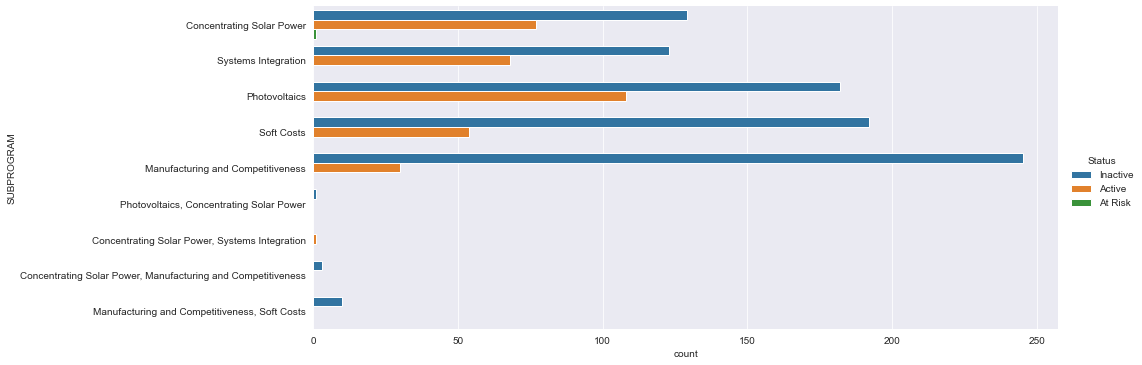

In [6]:
sns.catplot(y='SUBPROGRAM',data=solar_projects_df, hue = 'Status',kind='count', aspect = 3, orientation = 'horizontal')

This horizontal bar plot demonstrates the majority of active funding is going towards R&D for photovoltaics. It appears that the necessity for improvements in Manufacturing and Competitiveness has reached an optimal level and is becoming less necessary.

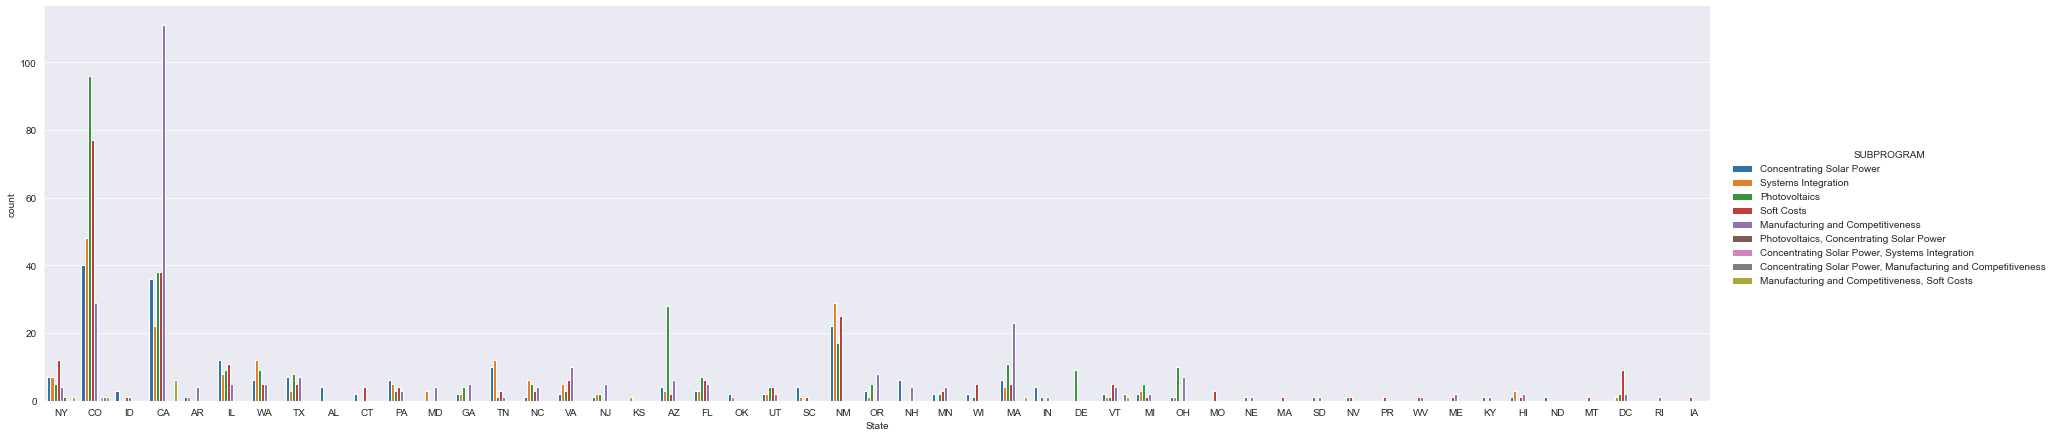

In [7]:
sns.catplot(x='State',data=solar_projects_df, hue = 'SUBPROGRAM',kind='count', aspect = 4, height= 6, orientation = 'vertical')

Most projects are funded in Colorado, California, and New Mexico. For Colorado, the 2 most funded projects appear to be for R&D in photovoltaics and soft costs. For California, the most funded projects are related to manufacturing and competitiveness by far. New Mexico's projects are funded evenly between projects related to concentrating solar power, systems integration, soft costs, and R&D for photovoltaics. It's important to note these include all projects funded within the last few decades. Below is a bar graph with only active projects.

In [8]:
solar_projects_df.Status.value_counts()

Inactive    885
Active      338
At Risk       1
Name: Status, dtype: int64

In [9]:
def active_projects_check(activity):
    """
    This function is going to be used to determine the number of active projects per statistical category.
    This should help identify how active projects are distributed across the US.
    
    Inputs: A value from the solar_projects_df.Status Series to check to see if a project is active or not.
    Outputs: Null values for anything other than 'Active' and the state where the project is located. 
    """
    if activity == 'Active':
        return solar_projects_df.State[i]
    elif activity == 'Inactive':
        return np.nan
    else:
        return np.nan

In [10]:
solar_projects_df['Active_Project_Check'] = 0
for i in solar_projects_df.index:
    solar_projects_df['Active_Project_Check'][i] = active_projects_check(solar_projects_df.Status[i])

<ipython-input-10-e280fde62691>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_projects_df['Active_Project_Check'][i] = active_projects_check(solar_projects_df.Status[i])
C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
solar_projects_df.Active_Project_Check.value_counts()

CO    92
CA    51
AZ    16
NM    16
WA    15
IL    13
MA    11
NY    11
TN    11
OH    10
VA     8
FL     8
TX     8
MI     6
NC     6
UT     6
PA     5
OR     5
GA     5
NJ     4
VT     4
DC     4
IN     3
OK     3
NH     3
WI     2
MD     2
ND     1
NV     1
KS     1
MN     1
AR     1
DE     1
KY     1
CT     1
HI     1
Name: Active_Project_Check, dtype: int64

In [12]:
active_PIs = solar_projects_df.groupby('Principal_Investigator').Active_Project_Check.value_counts().sort_values(ascending=False)

# How many PIs are working on 2 or more active projects funded by the federal government?
list_of_active_PIs_with_gt_2_projects = []

for i in active_PIs.index:
    if active_PIs[i] > 1 :
        list_of_active_PIs_with_gt_2_projects.append([i,active_PIs[i]])
        
list_of_active_PIs_with_gt_2_projects

[[('Robert Margolis', 'CO'), 4],
 [('Kristopher Davis', 'FL'), 3],
 [('Monisha Shah', 'CO'), 3],
 [('Galen Barbose', 'CA'), 3],
 [('Kenneth Sandhage', 'IN'), 3],
 [('Manajit Sengupta', 'CO'), 3],
 [('Dileep Singh', 'IL'), 3],
 [('Robert Broadwater', 'VA'), 2],
 [('Govindasamy Tamizhmani', 'AZ'), 2],
 [('Minjoo Lee', 'IL'), 2],
 [('Laurie Burnham', 'NM'), 2],
 [('Sumit Agarwal', 'CO'), 2],
 [('Asegun Henry', 'MA'), 2],
 [('Jeff Cook', 'CO'), 2],
 [('Ben Hoen', 'CA'), 2],
 [('Jason Wilkes', 'TX'), 2],
 [('Govindarajan Muralidharan', 'TN'), 2],
 [('Jason Mortzheim', 'NY'), 2],
 [('James Sites', 'CO'), 2],
 [('Mariana Bertoni', 'AZ'), 2],
 [('Dan Small', 'NM'), 2],
 [('Roger French', 'OH'), 2],
 [('Masood Parvania', 'UT'), 2],
 [('Heayoung Yoon', 'UT'), 2],
 [('Tyler Grassman', 'OH'), 2],
 [('Michael Keller', 'OK'), 2],
 [('Ulrich Muenz', 'NJ'), 2],
 [('Kelvin Lynn', 'WA'), 2],
 [('Jordan Macknick', 'CO'), 2],
 [('Philip Gleckman', 'CA'), 2],
 [('Joseph Berry', 'CO'), 2],
 [('Adele Tamboli

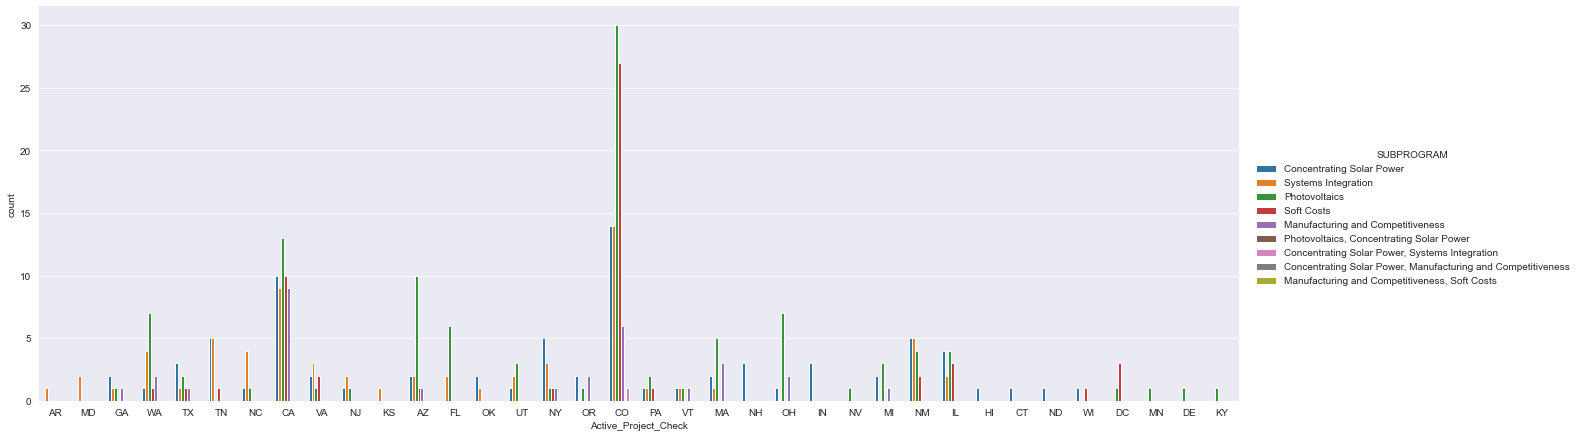

In [13]:
sns.catplot(x='Active_Project_Check',data=solar_projects_df,
            hue = 'SUBPROGRAM',kind='count', aspect = 2.9, height= 6, orientation = 'vertical')

Below is a list of all states that have very few funded projects related to solar energy and may be good target markets to focus on to begin flipping economies from being reliant on non-renewable resources to more reliant on renewable resources.

In [14]:
solar_projects_df.groupby('State').count()

,Awardees,SUBPROGRAM,Award_Type,FOA_Acronym,Status,Award_Start_Date,Award_End_Date,Total_Government_Share,Cost_Share,City,Latitude,Longitude,Principal_Investigator,Active_Project_Check
State,,,,,,,,,,,,,,
AL,4,4,4,4,4,4,4,4,4,4,4,4,4,0
AR,6,6,6,6,6,6,6,6,6,6,6,6,6,1
AZ,43,43,43,43,43,43,43,43,43,43,43,43,43,16
CA,251,251,251,246,251,251,234,251,251,251,251,251,242,51
CO,293,293,293,270,293,293,290,293,293,293,293,293,264,92
CT,6,6,6,6,6,6,6,6,6,6,6,6,6,1
DC,14,14,14,14,14,14,14,14,14,14,14,14,14,4
DE,9,9,9,9,9,9,9,9,9,9,9,9,9,1
FL,24,24,24,24,24,24,24,24,24,24,24,24,24,8


In [15]:
len(solar_projects_df.State.unique())

50

In [16]:
target_markets = []

for i in range(0,len(solar_projects_df.State.unique())-1):
    if solar_projects_df.groupby('State').count().Active_Project_Check[i] == 1  or solar_projects_df.groupby('State').count().Active_Project_Check[i] == 0:
        target_markets.append(solar_projects_df.groupby('State').count().index[i])
    else:
        continue
        
print('This is a list of states with 1 or fewer active projects as of 2021: ')
target_markets

This is a list of states with 1 or fewer active projects as of 2021: 


['AL',
 'AR',
 'CT',
 'DE',
 'HI',
 'IA',
 'ID',
 'KS',
 'KY',
 'MA ',
 'ME',
 'MN',
 'MO',
 'MT',
 'ND',
 'NE',
 'NV',
 'PR',
 'RI',
 'SC',
 'SD',
 'WV']

In [17]:
solar_projects_df.Total_Government_Share.values.std()

2564552.5048646424

Text(0.5, 1.0, 'Total Government Costs per project vs. Total Cost of the project')

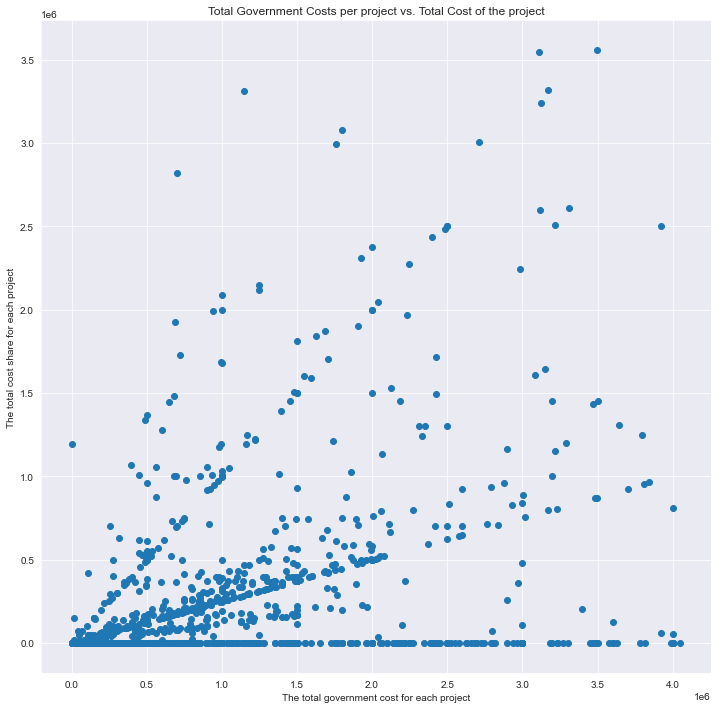

In [18]:
# Looking at active projects and how they're funded by the federal government

total_gov_cost = []
cost_share = []
for i in solar_projects_df.index:
    if (solar_projects_df.Total_Government_Share.values[i] < solar_projects_df.Total_Government_Share.values.mean() + solar_projects_df.Total_Government_Share.values.std()) and (solar_projects_df.Cost_Share.values[i] < solar_projects_df.Cost_Share.values.mean() + solar_projects_df.Cost_Share.values.std()):
        if solar_projects_df.Active_Project_Check.values[i] != np.nan:
            total_gov_cost.append(solar_projects_df.Total_Government_Share.values[i])
            cost_share.append(solar_projects_df.Cost_Share.values[i])
        else:
            continue
    else:
        pass

plt.figure(figsize=(12,12))
plt.scatter(x=total_gov_cost,y=cost_share,marker='o')
plt.xlabel('The total government cost for each project')
plt.ylabel('The total cost share for each project')
plt.title('Total Government Costs per project vs. Total Cost of the project')

In [19]:
len(total_gov_cost)

1132

There appear to be 3 distinct regression patterns seen in this data. There are projects that are fully paid off by the federal government, projects that are mostly paid off by the federal government, and projects that are somewhat paid off by the federal government. What factors affect this categorization, if any are applicable?

## Factors that affect how a project is funded by the federal government:

My hypothesis is that these categorizations are based off Award Type, the type of project (Subprogram), and/or awardees.

Let's look at these categories and see if there is any correlation with the distinct, linear relationships seen in the scatterplot above.

## Assigning Awardee Classes and checking correlation with the cost and funding trends

In [20]:
solar_projects_df.Awardees.value_counts()

National Renewable Energy Laboratory       228
Sandia National Laboratories                86
Arizona State University                    29
Oak Ridge National Laboratory               19
Argonne National Laboratory                 19
                                          ... 
Village Power Finance                        1
Energy Materials Corporation                 1
Applied Thermal Coatings                     1
nLiten Energy                                1
Hyper-Therm High-Temperature Composites      1
Name: Awardees, Length: 483, dtype: int64

In [21]:
# Making Awardee classifications for the solar_projects dataframe:
# Let's make 3 categories: Laboratories, Universities/Institutions, and Private Companies

solar_projects_df['Awardee_class'] = 0
for i in solar_projects_df.index:
    if ('Laboratory' or 'Laboratories') in solar_projects_df.Awardees[i]:
        solar_projects_df.Awardee_class[i] = 'Laboratory'
    elif ('University' or 'Institute') in solar_projects_df.Awardees[i]:
        solar_projects_df.Awardee_class[i] = 'University or Institute'
    else:
        solar_projects_df.Awardee_class[i] = 'Private Company or Other'

<ipython-input-21-f24ae288fa32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_projects_df.Awardee_class[i] = 'University or Institute'
C:\Users\dfbod\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-f24ae288fa32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_projects_df.Awardee_class[i] = 'Private Compan

In [22]:
solar_projects_df.Awardee_class.value_counts()

Private Company or Other    657
Laboratory                  329
University or Institute     238
Name: Awardee_class, dtype: int64

In [23]:
hue_check_awardee_class = []

for i in solar_projects_df.index:
    if (solar_projects_df.Total_Government_Share.values[i] < solar_projects_df.Total_Government_Share.values.mean() + solar_projects_df.Total_Government_Share.values.std()) and (solar_projects_df.Cost_Share.values[i] < solar_projects_df.Cost_Share.values.mean() + solar_projects_df.Cost_Share.values.std()):
        if solar_projects_df.Active_Project_Check[i] != np.nan:
            hue_check_awardee_class.append(solar_projects_df.Awardee_class[i])
        else:
            continue
    else:
        pass
        
len(hue_check_awardee_class)

1132

Text(0.5, 1.0, 'Trends of different classes of awardees and their funding habits')

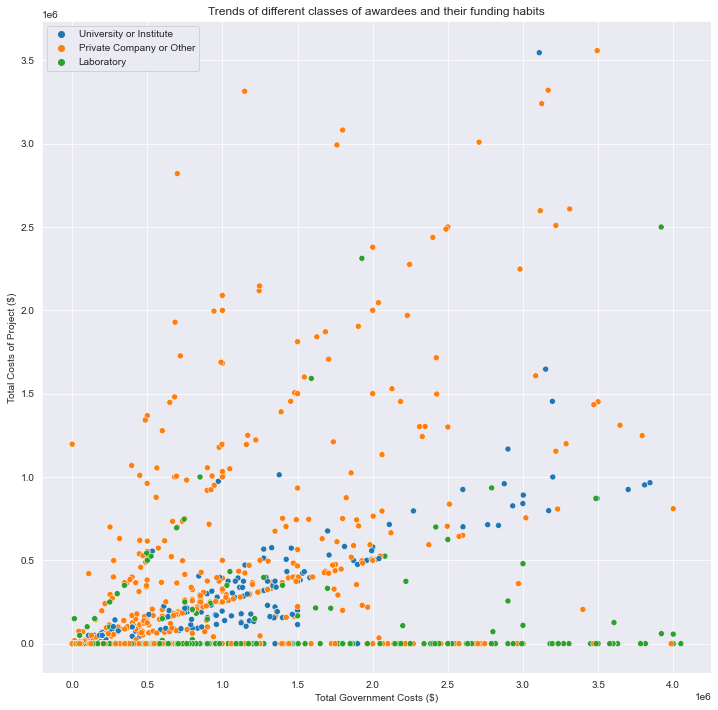

In [24]:
sns.utils.plt.figure(figsize=(12,12))
sns.scatterplot(x=total_gov_cost,y=cost_share, hue = hue_check_awardee_class)
sns.utils.plt.xlabel('Total Government Costs ($)')
sns.utils.plt.ylabel('Total Costs of Project ($)')
sns.utils.plt.title('Trends of different classes of awardees and their funding habits')

There does seem to be a strong correlation that laboratories working on expensive (more than $500,000$ USD) projects are funded fully by the government. For projects that require less than $500,000$ USD to for completion, they receive funding at similar rates to a private company. 

Universities and Institutes appear to have a lower rate than private companies (their projects are mostly funded) but they're very rarely funded completely. They very rarely have to pay more than 50 percent of the project's total costs.

Private companies/other companies have a considerable amount of fluctuation in terms of whether or not their projects are mostly funded by the federal government or only somewhat funded by the federal government. 

## Check to see which types of programs correlate well with the total cost and funding of projects:

In [25]:
hue_check_subprogram = []

for i in solar_projects_df.index:
    if (solar_projects_df.Total_Government_Share.values[i] < solar_projects_df.Total_Government_Share.values.mean() + solar_projects_df.Total_Government_Share.values.std()) and (solar_projects_df.Cost_Share.values[i] < solar_projects_df.Cost_Share.values.mean() + solar_projects_df.Cost_Share.values.std()):
        if solar_projects_df.Active_Project_Check[i] != np.nan:
            hue_check_subprogram.append(solar_projects_df.SUBPROGRAM[i])
        else:
            continue
    else:
        pass
len(hue_check_subprogram)

1132

Text(0.5, 1.0, 'Types of projects funded by the US federal government vs. the total costs of the projects')

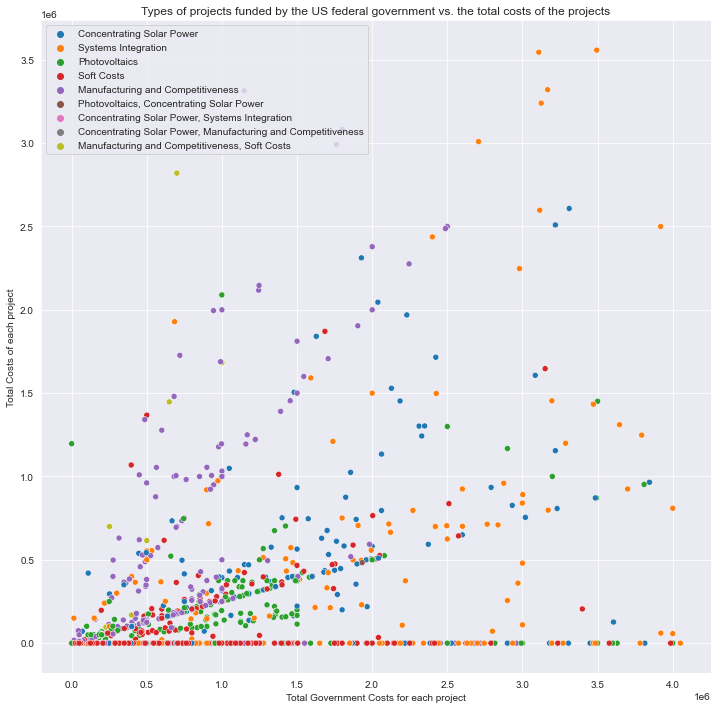

In [26]:
sns.utils.plt.figure(figsize=(12,12))
sns.scatterplot(x=total_gov_cost,y=cost_share, hue = hue_check_subprogram)
sns.utils.plt.xlabel('Total Government Costs for each project ($)')
sns.utils.plt.ylabel('Total Costs of each project ($)')
sns.utils.plt.title('Types of projects funded by the US federal government vs. the total costs of the projects')

Most of the soft cost projects are fully funded by the government, and R&D for photovoltaics appear to be mostly funded. Manufacturing and Competitiveness type of projects seem to receive, proportionally and consistently, the least amount of funding out of every other type of project. Systems Integration and concentrating solar power vary drastically in terms of how much of a project is funded by the government. This is the case for all active projects. 

## Check to see if Award Type affects these trends:

In [27]:
solar_projects_df.Award_Type.value_counts()

Funding Opportunity    839
Lab Award              380
Prize Competition        5
Name: Award_Type, dtype: int64

In [28]:
hue_check_award_type = []

for i in solar_projects_df.index:
    if (solar_projects_df.Total_Government_Share.values[i] < solar_projects_df.Total_Government_Share.values.mean() + solar_projects_df.Total_Government_Share.values.std()) and (solar_projects_df.Cost_Share.values[i] < solar_projects_df.Cost_Share.values.mean() + solar_projects_df.Cost_Share.values.std()):
        if solar_projects_df.Active_Project_Check[i] != np.nan:
            hue_check_award_type.append(solar_projects_df.Award_Type[i])
        else:
            continue
    else:
        pass
len(hue_check_award_type)

1132

Text(0.5, 1.0, 'Types of awards funded by the US federal government vs. the total costs of the projects')

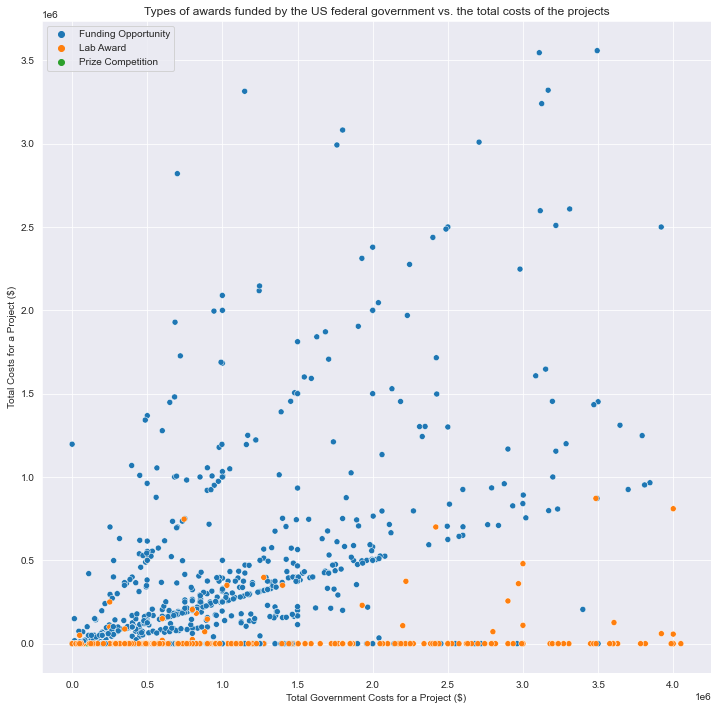

In [29]:
sns.utils.plt.figure(figsize=(12,12))
sns.scatterplot(x=total_gov_cost,y=cost_share, hue = hue_check_award_type)
sns.utils.plt.xlabel('Total Government Costs for a Project ($)')
sns.utils.plt.ylabel('Total Costs for a Project ($)')
sns.utils.plt.title('Types of awards funded by the US federal government vs. the total costs of the projects')

Almost all active projects that were fully funded were considered lab awards. Everything else was primarily a funding opportunity. There are a few projects that were considered lab awards but still had additional expenses that had to be paid 'out-of-pocket'. 